In [7]:
!pip install -U docarray[all] jina matplotlib

Requirement already up-to-date: docarray[all] in /Users/peppermint/Desktop/codes/python/jina-fun/venv/lib/python3.8/site-packages (0.13.11)
Requirement already up-to-date: jina in /Users/peppermint/Desktop/codes/python/jina-fun/venv/lib/python3.8/site-packages (3.4.2)
  Using cached matplotlib-3.5.2-cp38-cp38-macosx_10_9_x86_64.whl (7.3 MB)
  Using cached kiwisolver-1.4.2-cp38-cp38-macosx_10_9_x86_64.whl (65 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached fonttools-4.33.3-py3-none-any.whl (930 kB)
You should consider upgrading via the '/Users/peppermint/Desktop/codes/python/jina-fun/venv/bin/python -m pip install --upgrade pip' command.


In [8]:
!jina hub pull "jinahub://PDFSegmenter" --install-requirements

⠋ Installing requirements.txt...
╭─────────────────────────────── Use via source ───────────────────────────────╮
│ from jina import Flow                                                        │
│                                                                              │
│ f = Flow().add(uses='jinahub://PDFSegmenter')                                │
│                                                                              │
╰──────────────────────────────────────────────────────────────────────────────╯


UserWarning: install "ipywidgets" for Jupyter support (raised from /Users/peppermint/Desktop/
codes/python/jina-fun/venv/lib/python3.8/site-packages/rich/live.py:221)

╭───── 🎉 Flow is ready to serve! ─────╮
│  🔗  Protocol                GRPC    │
│  🏠     Local       ]8;id=311889;grpc://0.0.0.0:58735\0.0.0.0]8;;\]8;id=311889;grpc://0.0.0.0:58735\:]8;;\]8;id=311889;grpc://0.0.0.0:58735\58735]8;;\    │
│  🔒   Private    ]8;id=19847;grpc://10.0.0.108:58735\10.0.0.108]8;;\]8;id=19847;grpc://10.0.0.108:58735\:]8;;\]8;id=19847;grpc://10.0.0.108:58735\58735]8;;\    │
│  🌍    Public  ]8;id=964932;grpc://24.4.218.237:58735\24.4.218.237]8;;\]8;id=964932;grpc://24.4.218.237:58735\:]8;;\]8;id=964932;grpc://24.4.218.237:58735\58735]8;;\    │
╰──────────────────────────────────────╯

['image/*', 'image/*', 'text/plain']


╭──────────────────────── Documents Summary ─────────────────────────╮
│                                                                    │
│   Length                    1                                      │
│   Homogenous Documents      True                                   │
│   Has nested Documents in   ('chunks',)                            │
│   Common Attributes         ('id', 'mime_type', 'uri', 'chunks')   │
│   Multimodal dataclass      False                                  │
│                                                                    │
╰────────────────────────────────────────────────────────────────────╯
╭──────────────────────── Attributes Summary ────────────────────────╮
│                                                                    │
│   Attribute   Data type         #Unique values   Has empty value   │
│  ────────────────────────────────────────────────────────────────  │
│   chunks      ('ChunkArray',)   1                False             │
│   id          ('str',)          1                False             │
│   mime_type   ('str',)          1                False             │
│   uri         ('str',)          1                False             │
│                                                                    │
╰────────────────────────────────────────────────────────────────────╯

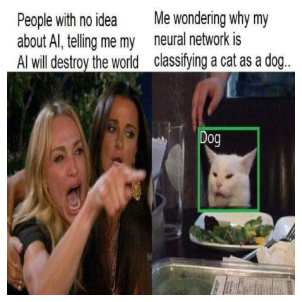

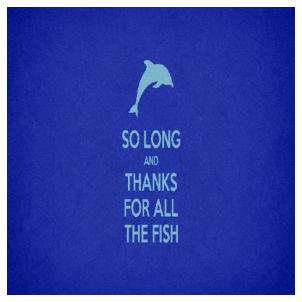

In [37]:
from docarray import DocumentArray, Document
from jina import Flow


doc = DocumentArray([Document(uri='./data/pdf/cats_are_awesome.pdf')])


f = Flow().add(
    uses='jinahub://PDFSegmenter',
)
with f:
    resp = f.post(on='/craft', inputs=doc)
    print(f'{[c.mime_type for c in resp[0].chunks]}')

resp.summary()

resp["@c", ["id", "mime_type"]] # ['image/*', 'image/*', 'text/plain']

resp0_img0 = DocumentArray([resp[0].chunks[0]])
resp0_img0.plot_image_sprites()

resp0_img2 = DocumentArray([resp[0].chunks[1]])
resp0_img2.plot_image_sprites()
